# Particle Physics Event Classificator

Accurately separating rare signal (s) events from abundant background (b) is central to particle physics.
This dataset provides reconstructed kinematic features per event, along with a per-event Weight to reflect experimental importance. 
The task is binary classification: predict whether an event is signal (s) or background (b).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_raw = pd.read_csv('/workspaces/particle-collision-classification/data/raw/Particle Physics Event Classification.csv')
df_raw.sample(10, random_state=2025)

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
177817   277817        76.740                       43.306        61.253   
114117   214117        76.291                       12.864        54.706   
218727   318727        83.701                      124.825        71.534   
242708   342708       133.276                       79.435       103.680   
78083    178083        95.130                       92.170        85.114   
113743   213743       128.881                        4.445        84.894   
188351   288351       121.074                       21.141        79.973   
165724   265724       185.240                       73.543       147.203   
142400   242400        86.190                       81.244        70.663   
185228   285228        97.379                       14.258        70.776   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
177817     1.278              -999.000          -999.000             -999.000   
114117    58.490                 1.103           143.215               -0.270   
218727    70.848              -999.000          -999.000             -999.000   
242708   138.187              -999.000          -999.000             -999.000   
78083     41.222              -999.000          -999.000             -999.000   
113743     4.079              -999.000          -999.000             -999.000   
188351    77.517              -999.000          -999.000             -999.000   
165724    99.234                 2.597           157.718               -1.168   
142400    54.976                 3.787           323.212               -1.932   
185228    49.106              -999.000          -999.000             -999.000   

        DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
177817               2.549       1.278  ...            0            -999.000   
114117               1.748      11.717  ...            2              90.305   
218727               1.721      27.752  ...            1              51.981   
242708               1.821      10.642  ...            1             132.205   
78083                1.910       1.953  ...            1              40.366   
113743               3.108      41.778  ...            1              38.334   
188351               2.289      14.580  ...            1              81.565   
165724               3.186      22.200  ...            2              61.623   
142400               2.073      15.443  ...            2              70.642   
185228               2.635      49.106  ...            0            -999.000   

        PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
177817             -999.000             -999.000               -999.000   
114117               -0.367                1.405                 43.035   
218727                0.003               -0.307               -999.000   
242708               -0.485               -1.640               -999.000   
78083                -1.652                0.230               -999.000   
113743               -2.637               -0.085               -999.000   
188351                2.014                2.716               -999.000   
165724                0.578                2.090                 31.977   
142400               -3.180               -0.663                 31.973   
185228             -999.000             -999.000               -999.000   

        PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  \
177817                -999.000                -999.000           0.000   
114117                   0.736                  -2.130         133.340   
218727                -999.000                -999.000          51.981   
242708                -999.000                -999.000         132.205   
78083                 -999.000                -999.000          40.366   
113743                -999.000                -999.000          38.334   
188351                -999.000                -999.000

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [3]:
# Preprocessing
df_baking = df_raw.copy()

df_baking.columns = df_baking.columns.str.lower()

# In this dataset, values coded as -999 are refered as null
df_baking = df_baking.replace(-999, np.nan)
df_baking.isna().sum()

eventid                             0
der_mass_mmc                    38114
der_mass_transverse_met_lep         0
der_mass_vis                        0
der_pt_h                            0
der_deltaeta_jet_jet           177456
der_mass_jet_jet               177457
der_prodeta_jet_jet            177457
der_deltar_tau_lep                  0
der_pt_tot                          0
der_sum_pt                          0
der_pt_ratio_lep_tau                0
der_met_phi_centrality              0
der_lep_eta_centrality         177457
pri_tau_pt                          0
pri_tau_eta                         0
pri_tau_phi                         0
pri_lep_pt                          0
pri_lep_eta                         0
pri_lep_phi                         0
pri_met                             0
pri_met_phi                         0
pri_met_sumet                       0
pri_jet_num                         0
pri_jet_leading_pt              99913
pri_jet_leading_eta             99913
pri_jet_lead

In [4]:
# Drop columns with missing values > 30%
missing =  df_baking.isna().mean()
df_missing = missing[missing > 0.3]

display("Columns with > 30% missing values:")
display(df_missing)

'Columns with > 30% missing values:'

der_deltaeta_jet_jet      0.709824
der_mass_jet_jet          0.709828
der_prodeta_jet_jet       0.709828
der_lep_eta_centrality    0.709828
pri_jet_leading_pt        0.399652
pri_jet_leading_eta       0.399652
pri_jet_leading_phi       0.399652
pri_jet_subleading_pt     0.709828
pri_jet_subleading_eta    0.709828
pri_jet_subleading_phi    0.709828
dtype: float64

In [5]:
df_baking = df_baking.drop(columns=df_missing.index)
df_baking = df_baking.drop(columns='eventid')

df_baking['label'] = df_baking['label'].astype('category')

# Fill other null columns
df_baking.fillna(df_baking.mean(numeric_only=True), inplace=True)

df = df_baking.copy()

df.sample(10, random_state=2025)

der_mass_mmc  der_mass_transverse_met_lep  der_mass_vis  der_pt_h  \
177817        76.740                       43.306        61.253     1.278   
114117        76.291                       12.864        54.706    58.490   
218727        83.701                      124.825        71.534    70.848   
242708       133.276                       79.435       103.680   138.187   
78083         95.130                       92.170        85.114    41.222   
113743       128.881                        4.445        84.894     4.079   
188351       121.074                       21.141        79.973    77.517   
165724       185.240                       73.543       147.203    99.234   
142400        86.190                       81.244        70.663    54.976   
185228        97.379                       14.258        70.776    49.106   

        der_deltar_tau_lep  der_pt_tot  der_sum_pt  der_pt_ratio_lep_tau  \
177817               2.549       1.278      62.038                 1.056   
114117               1.748      11.717     188.806                 0.948   
218727               1.721      27.752     180.209                 5.330   
242708               1.821      10.642     275.979                 4.246   
78083                1.910       1.953     139.157                 2.062   
113743               3.108      41.778     125.829                 0.607   
188351               2.289      14.580     171.166                 1.505   
165724               3.186      22.200     224.366                 4.807   
142400               2.073      15.443     196.365                 3.220   
185228               2.635      49.106      77.633                 2.024   

        der_met_phi_centrality  pri_tau_pt  ...  pri_lep_pt  pri_lep_eta  \
177817                  -1.414      30.168  ...      31.870        1.829   
114117                   0.080      28.473  ...      26.993        2.260   
218727                  -1.203      20.258  ...     107.970        0.799   
242708                   0.752      27.405  ...     116.369        1.092   
78083                   -1.412      32.260  ...      66.531       -1.247   
113743                  -1.407      54.454  ...      33.041        0.186   
188351                   0.064      35.773  ...      53.828        0.804   
165724                   1.408      22.518  ...     108.247        1.627   
142400                  -1.385      22.213  ...      71.536       -0.490   
185228                   1.360      25.674  ...      51.959       -0.812   

        pri_lep_phi  pri_met  pri_met_phi  pri_met_sumet  pri_jet_num  \
177817       -0.650   21.217       -2.618         45.879            0   
114117       -1.620    6.794       -2.610        322.180            2   
218727       -2.948   36.587       -0.043        255.662            1   
242708        1.155   29.223        2.654        467.286            1   
78083        -2.750   36.383       -0.324        198.778            1   
113743       -2.982   17.846        3.118        106.181            1   
188351       -0.514   51.061       -0.108        169.828            1   
165724       -0.958   25.995        0.574        229.652            2   
142400        2.777   36.668       -1.674        206.885            2   
185228       -2.872   17.097       -2.389        136.817            0   

        pri_jet_all_pt    weight  label  
177817           0.000  4.376978      b  
114117         133.340  2.234638      b  
218727          51.981  2.267154      b  
242708         132.205  0.001503      s  
78083           40.366  2.310104      b  
113743          38.334  0.001503      s  
188351          81.565  0.001503      s  
165724          93.600  3.037533      b  
142400         102.615  2.247697      b  
185228           0.000  1.681611      b  

[10 rows x 22 columns]

In [7]:
df.describe().T

count        mean         std        min  \
der_mass_mmc                 250000.0  121.858528   52.749898   9.044000   
der_mass_transverse_met_lep  250000.0   49.239819   35.344886   0.000000   
der_mass_vis                 250000.0   81.181982   40.828691   6.329000   
der_pt_h                     250000.0   57.895962   63.655682   0.000000   
der_deltar_tau_lep           250000.0    2.373100    0.782911   0.208000   
der_pt_tot                   250000.0   18.917332   22.273494   0.000000   
der_sum_pt                   250000.0  158.432217  115.706115  46.104000   
der_pt_ratio_lep_tau         250000.0    1.437609    0.844743   0.047000   
der_met_phi_centrality       250000.0   -0.128305    1.193585  -1.414000   
pri_tau_pt                   250000.0   38.707419   22.412081  20.000000   
pri_tau_eta                  250000.0   -0.010973    1.214079  -2.499000   
pri_tau_phi                  250000.0   -0.008171    1.816763  -3.142000   
pri_lep_pt                   250000.0   46.660207   22.064922  26.000000   
pri_lep_eta                  250000.0   -0.019507    1.264982  -2.505000   
pri_lep_phi                  250000.0    0.043543    1.816611  -3.142000   
pri_met                      250000.0   41.717235   32.894693   0.109000   
pri_met_phi                  250000.0   -0.010119    1.812223  -3.142000   
pri_met_sumet                250000.0  209.797178  126.499506  13.678000   
pri_jet_num                  250000.0    0.979176    0.977426   0.000000   
pri_jet_all_pt               250000.0   73.064591   98.015662   0.000000   
weight                       250000.0    1.646767    1.875103   0.001502   

                                    25%         50%         75%          max  
der_mass_mmc                  95.665000  119.958000  130.606250  1192.026000  
der_mass_transverse_met_lep   19.241000   46.524000   73.598000   690.075000  
der_mass_vis                  59.388750   73.752000   92.259000  1349.351000  
der_pt_h                      14.068750   38.467500   79.169000  2834.999000  
der_deltar_tau_lep             1.810000    2.491500    2.961000     5.684000  
der_pt_tot                     2.841000   12.315500   27.591000  2834.999000  
der_sum_pt                    77.550000  120.664500  200.478250  1852.462000  
der_pt_ratio_lep_tau           0.883000    1.280000    1.777000    19.773000  
der_met_phi_centrality        -1.371000   -0.356000    1.225000     1.414000  
pri_tau_pt                    24.591750   31.804000   45.017000   764.408000  
pri_tau_eta                   -0.925000   -0.023000    0.898000     2.497000  
pri_tau_phi                   -1.575000   -0.033000    1.565000     3.142000  
pri_lep_pt                    32.375000   40.516000   53.390000   560.271000  
pri_lep_eta                   -1.014000   -0.045000    0.959000     2.503000  
pri_lep_phi                   -1.522000    0.086000    1.618000     3.142000  
pri_met                       21.398000   34.802000   51.895000  2842.617000  
pri_met_phi                   -1.575000   -0.024000    1.561000     3.142000  
pri_met_sumet                123.017500  179.739000  263.379250  2003.976000  
pri_jet_num                    0.000000    1.000000    2.000000     3.000000  
pri_jet_all_pt                 0.000000   40.512500  109.933750  1633.433000  
weight                         0.018636    1.156188    2.404128     7.822543

It seems there aren't many outliers in the data since the std and the mean are relatively close. Further inspection is needed, but at first glance this dataset won't need any transformations if an XGB or RandomForest model is trained (which probably will). Otherwise this data should be at least scaled since there are features such as pri_met, der_pt_tot, etc. that go up to a thousand, while other features range in much lower values. 

In [8]:
# EDA
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=2025)
df_train, df_val = train_test_split(df_train, test_size=0.15, stratify=df_train['label'], random_state=2025)

# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_val.shape, df_test.shape

((170000, 22), (30000, 22), (50000, 22))

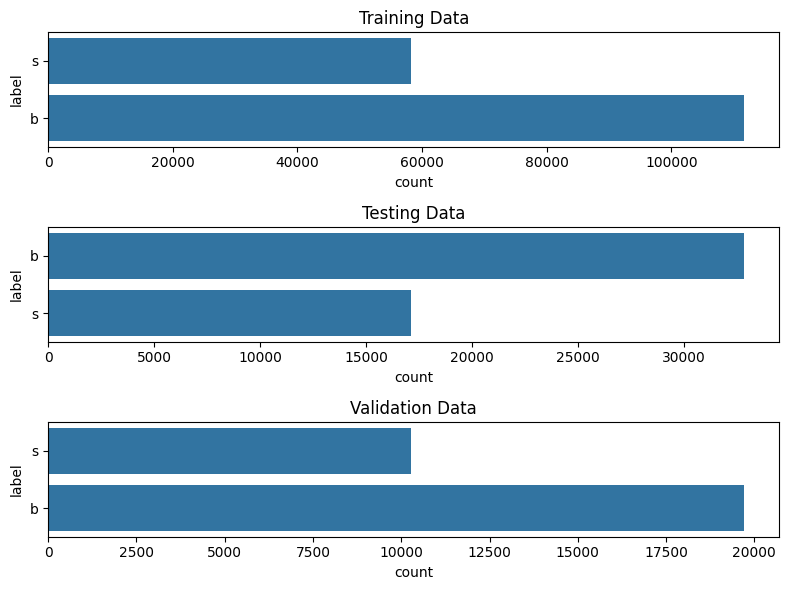

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

sns.countplot(data=df_train, y='label', ax=ax[0])
sns.countplot(data=df_test, y='label', ax=ax[1])
sns.countplot(data=df_val, y='label', ax=ax[2])

ax[0].set_title('Training Data')
ax[1].set_title('Testing Data')
ax[2].set_title('Validation Data')

plt.tight_layout()
plt.show()

PRI_ $\rightarrow$ Primary measurements. Raw measurements taken directly from the particle accelerator.

DER_ $\rightarrow$ Derived measurements. Derived measurements physicists reconstruct to better represent patterns.

For the purpose of this work, both types of measurements will be used, but the EDA will be performed separately to avoid dropping due to colinearity issues.

In [16]:
# Group by primary feature or derived feature from experiment
primary = [c for c in df_train.columns if c.startswith('pri_')]
derived = [c for c in df_train.columns if c.startswith('der_')]

primary.append('label')
derived.append('label')

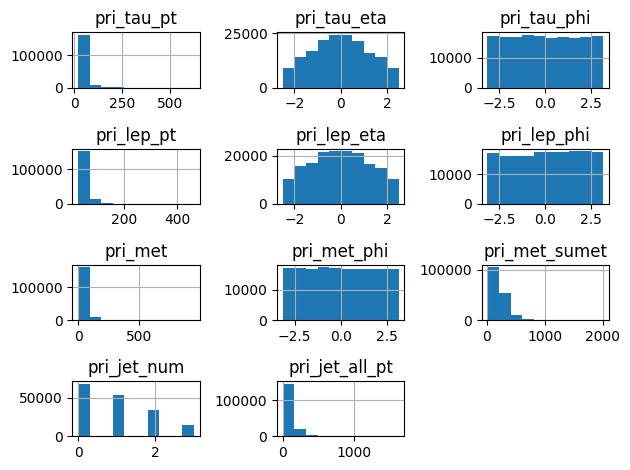

In [17]:
df_train[primary].hist()
plt.tight_layout()
plt.show()

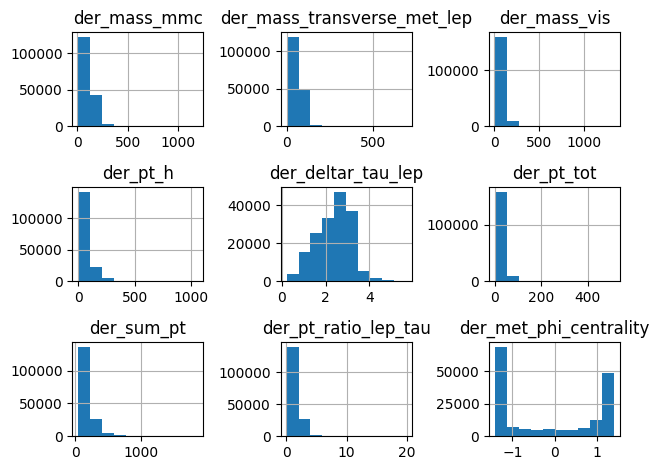

In [18]:
df_train[derived].hist()
plt.tight_layout()
plt.show()

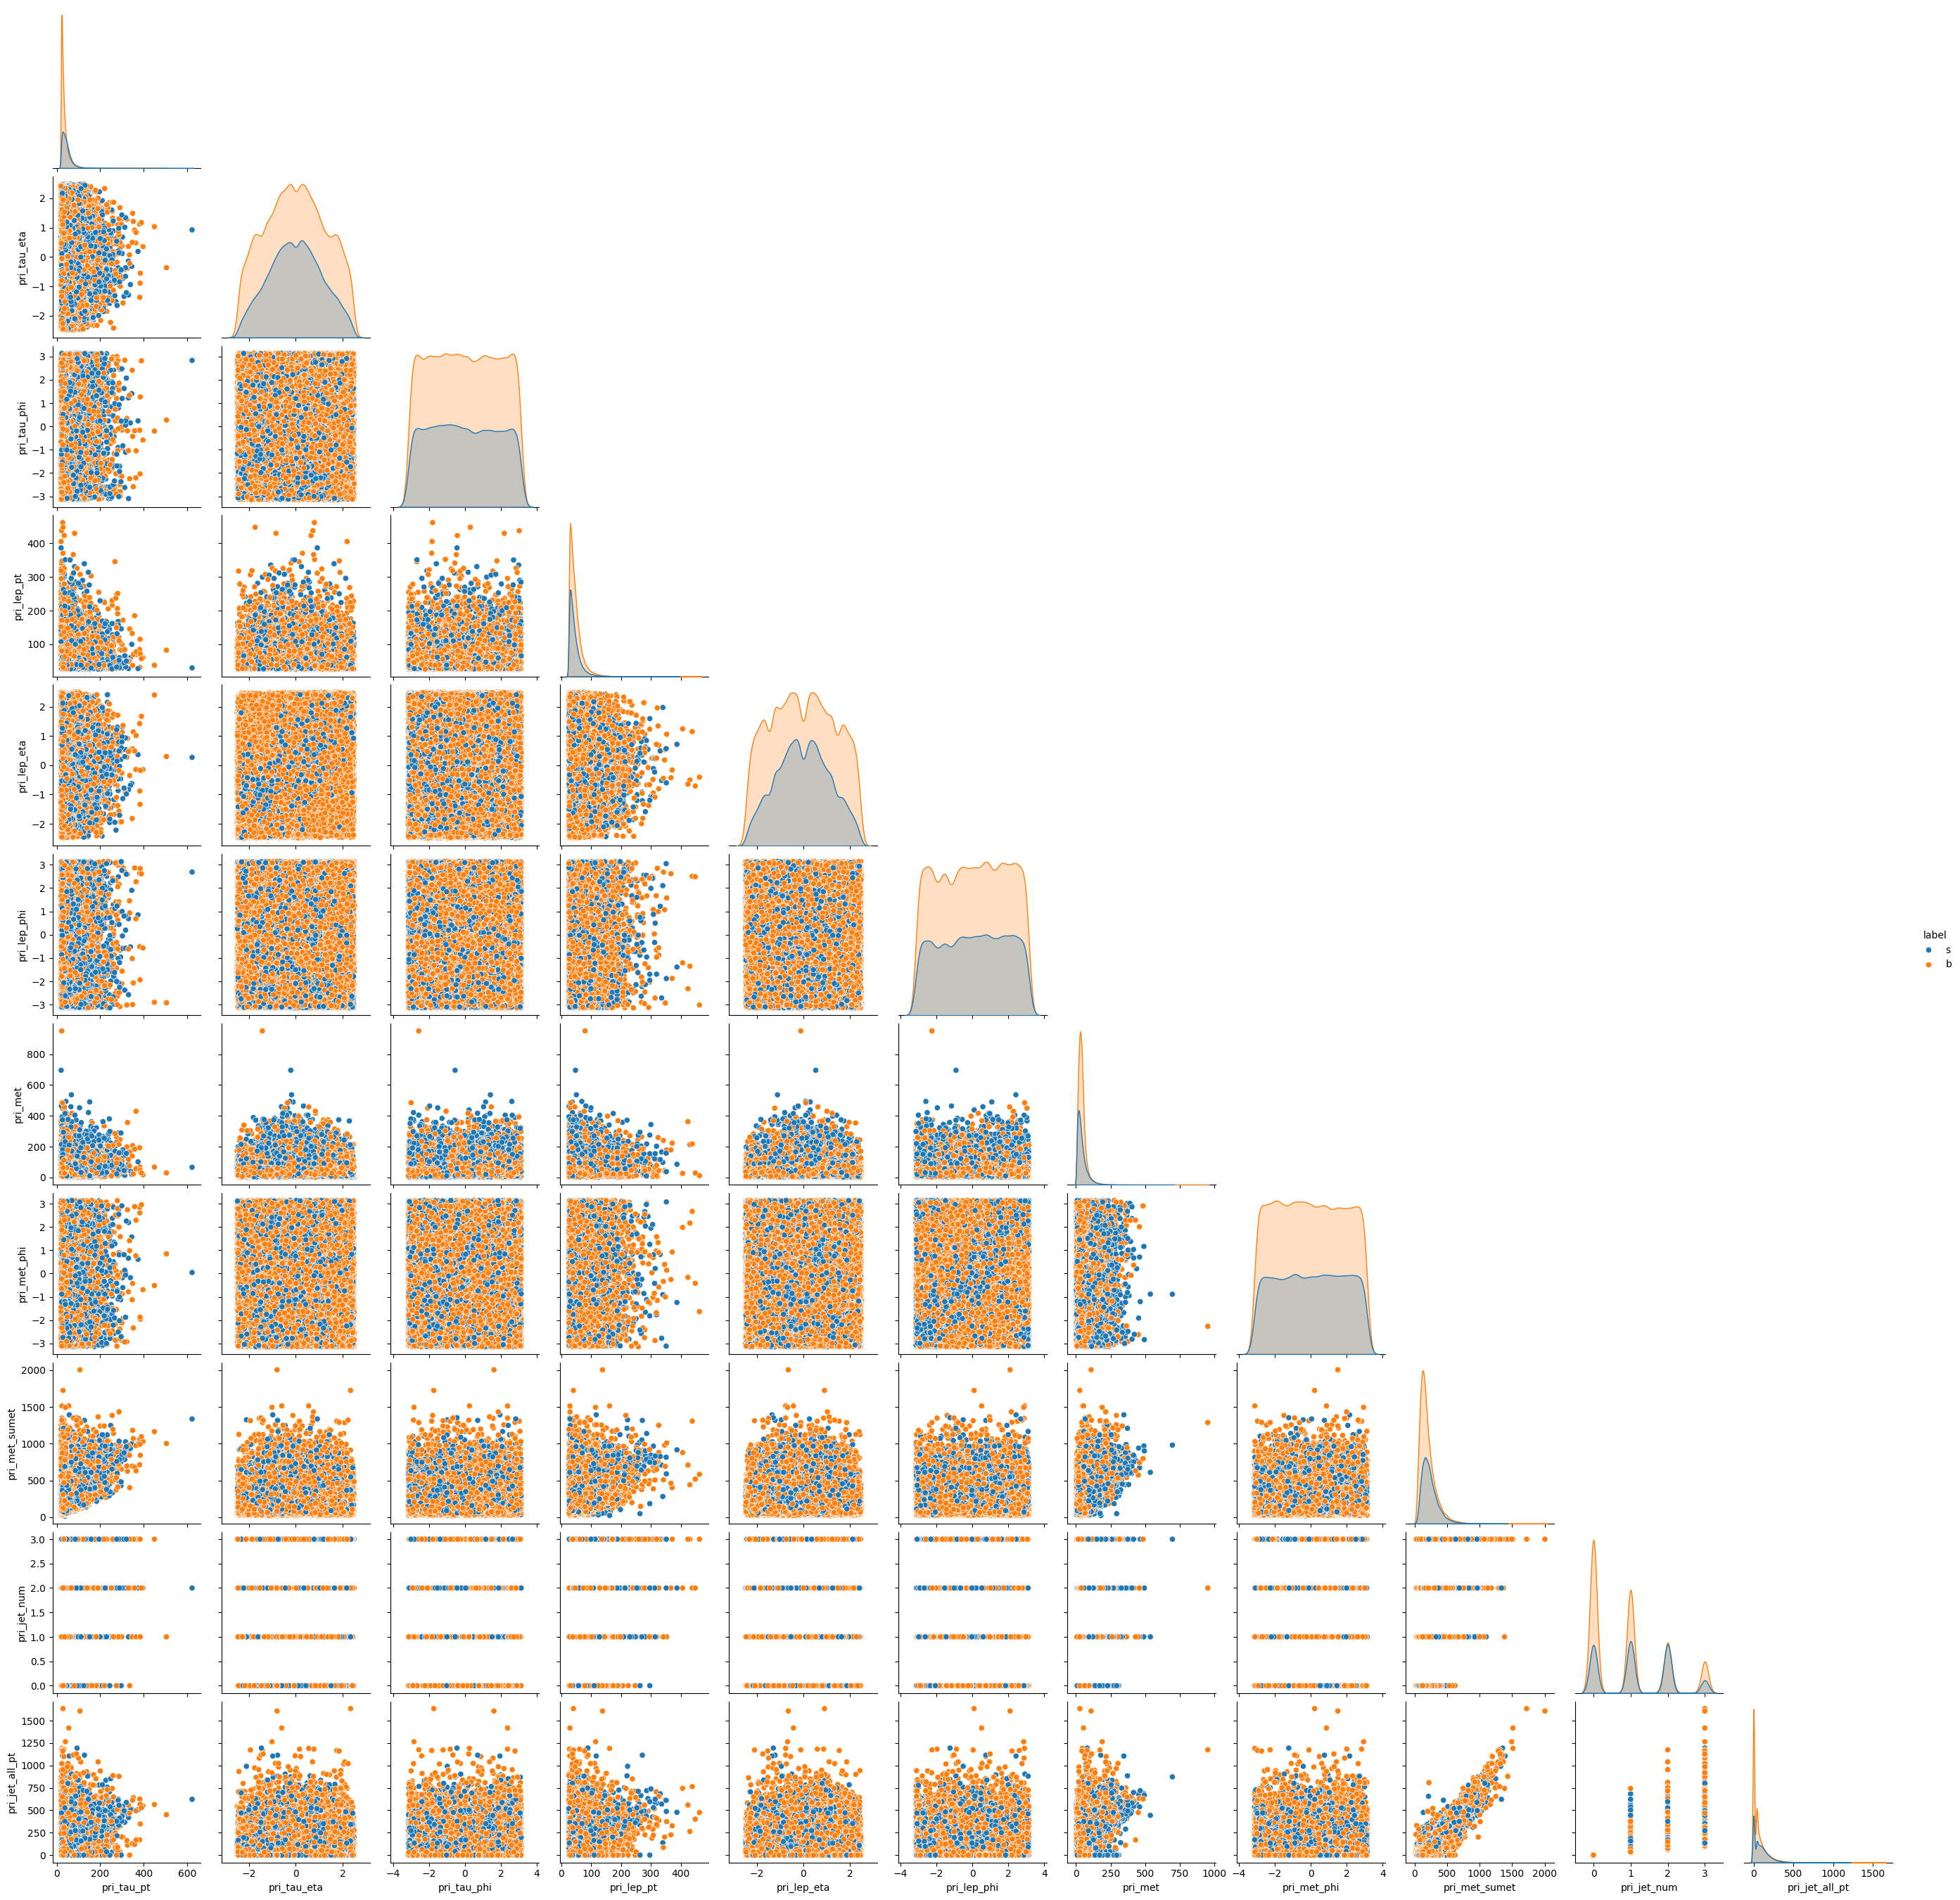

In [20]:
sns.pairplot(df_train[primary], corner=True, hue='label')
plt.show()

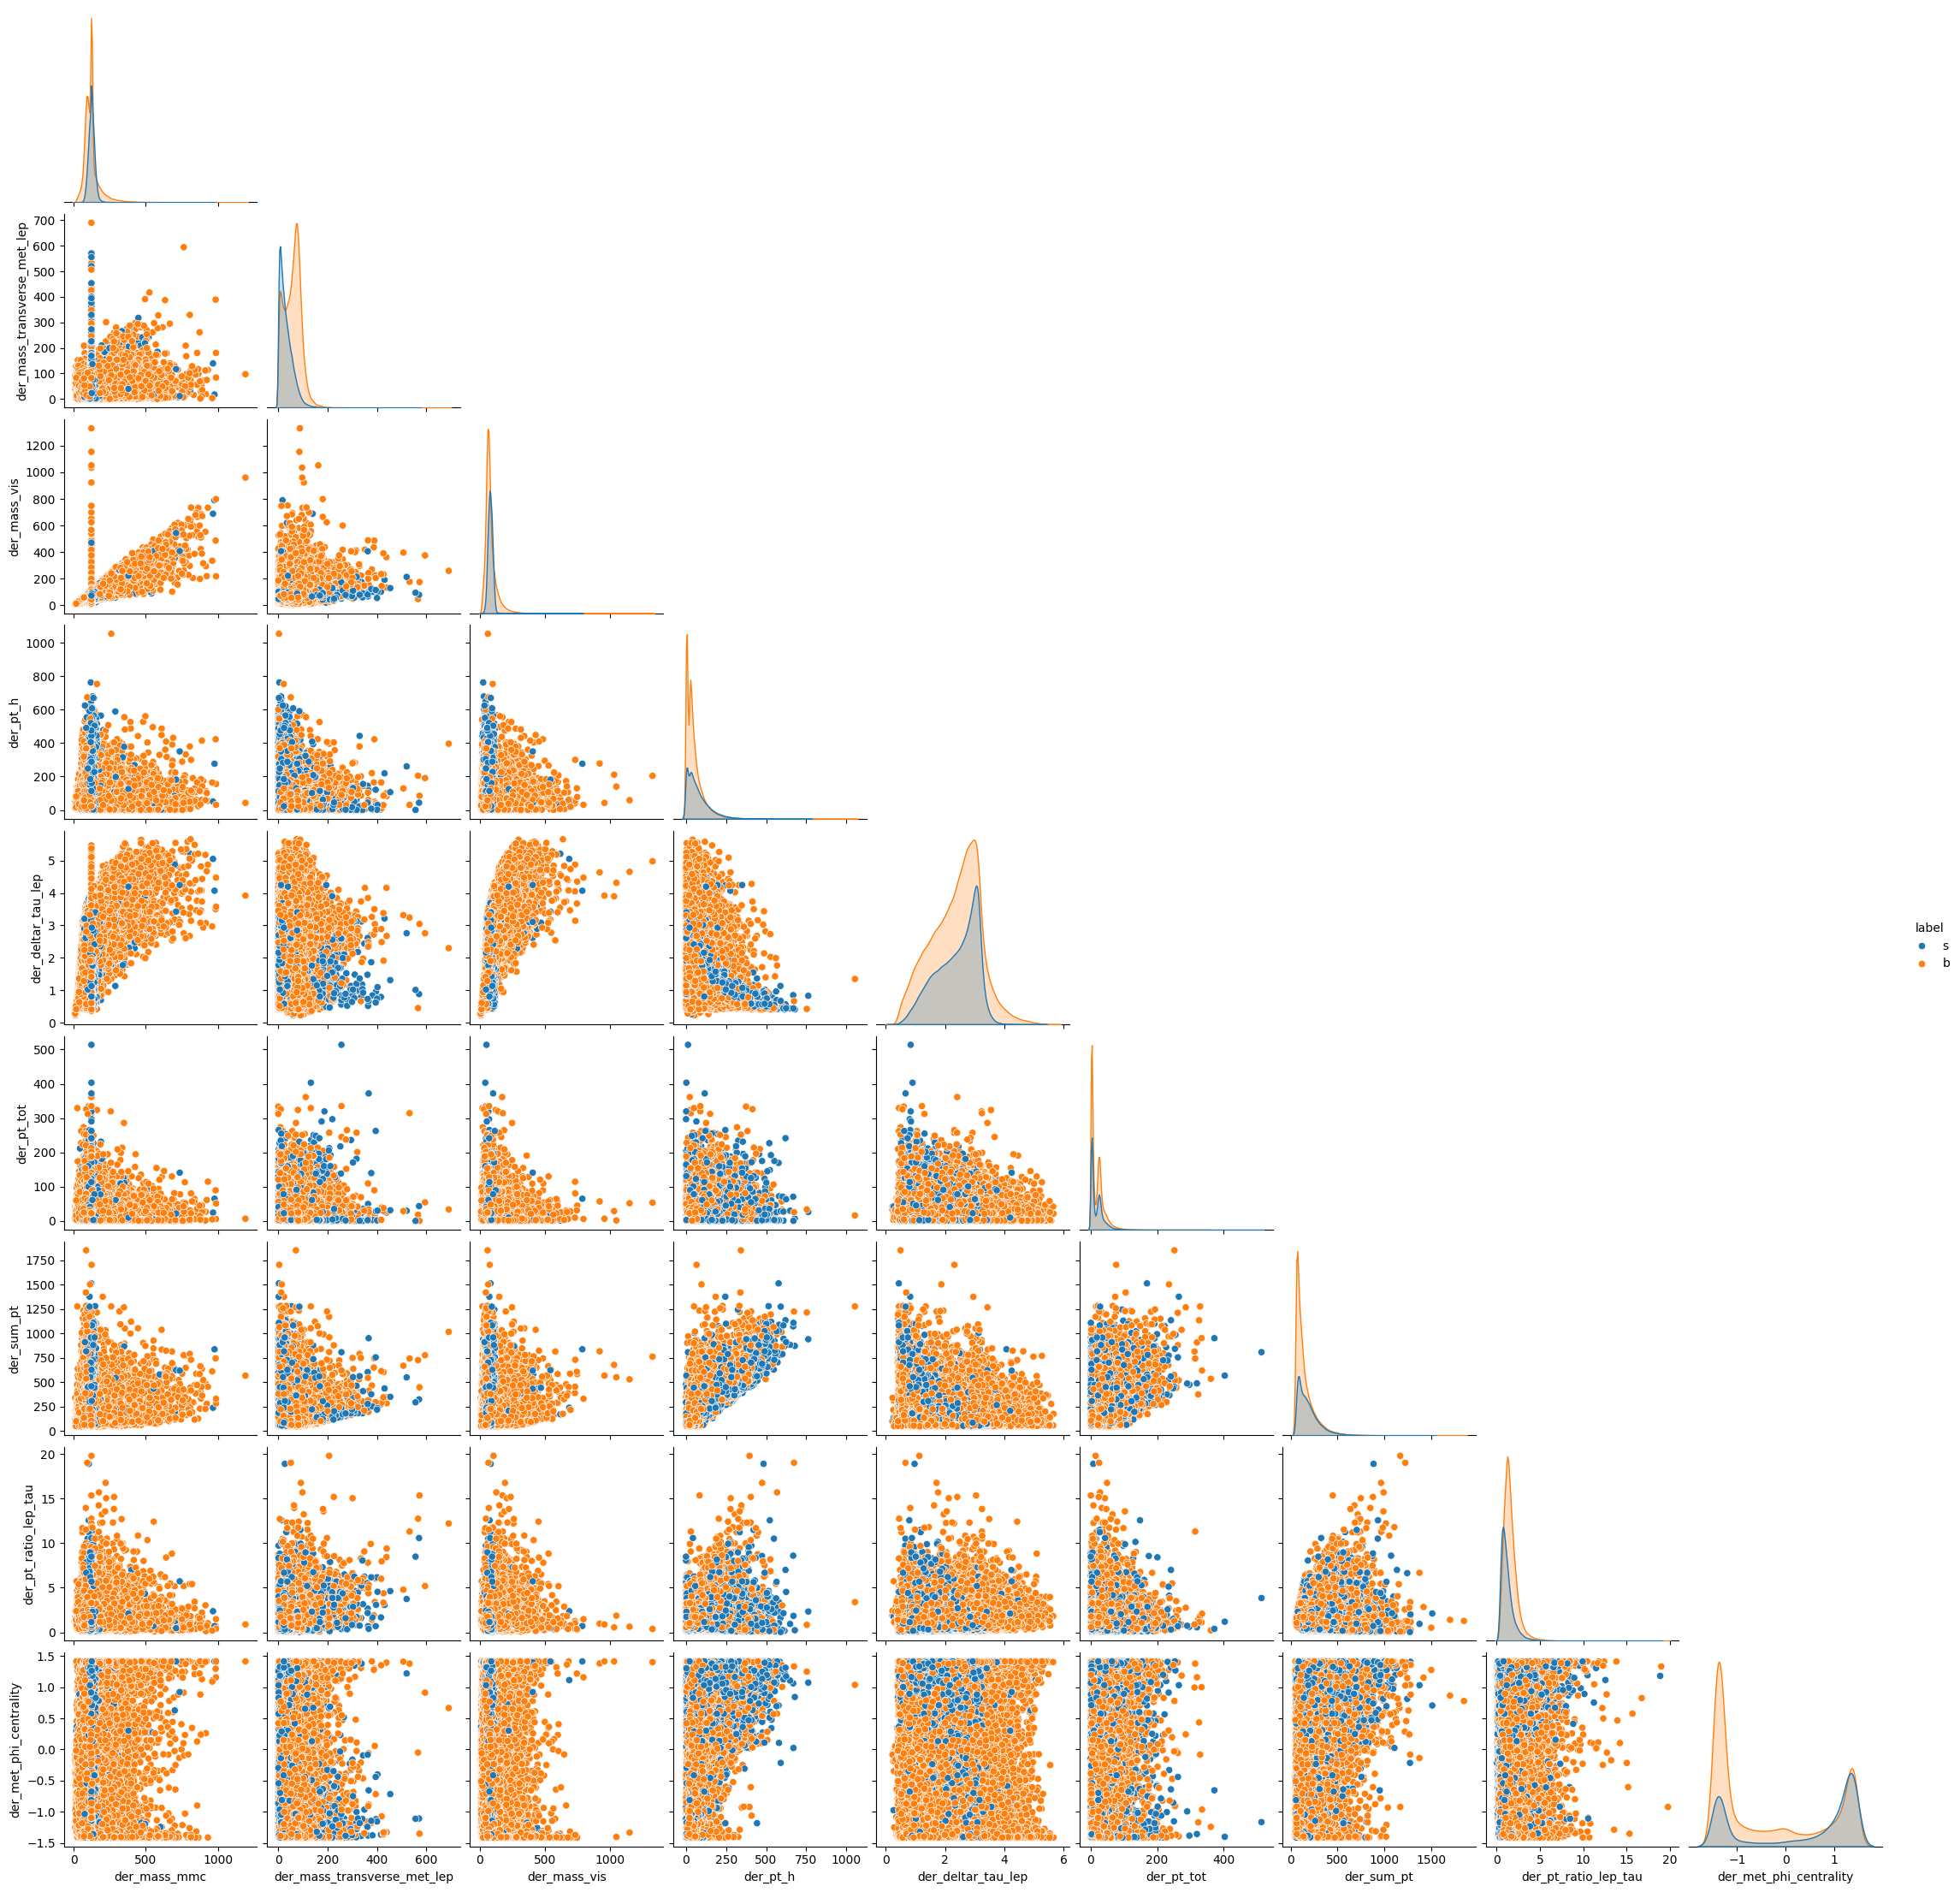

In [30]:
sns.pairplot(df_train[derived], hue='label', corner=True)
plt.show()

In [ ]:
# Save df
df_train.to_csv('../data/processed/df_train.csv', )
df_test.to_csv('../data/processed/df_test.csv', )
df_val.to_csv('../data/processed/df_val.csv', )